In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

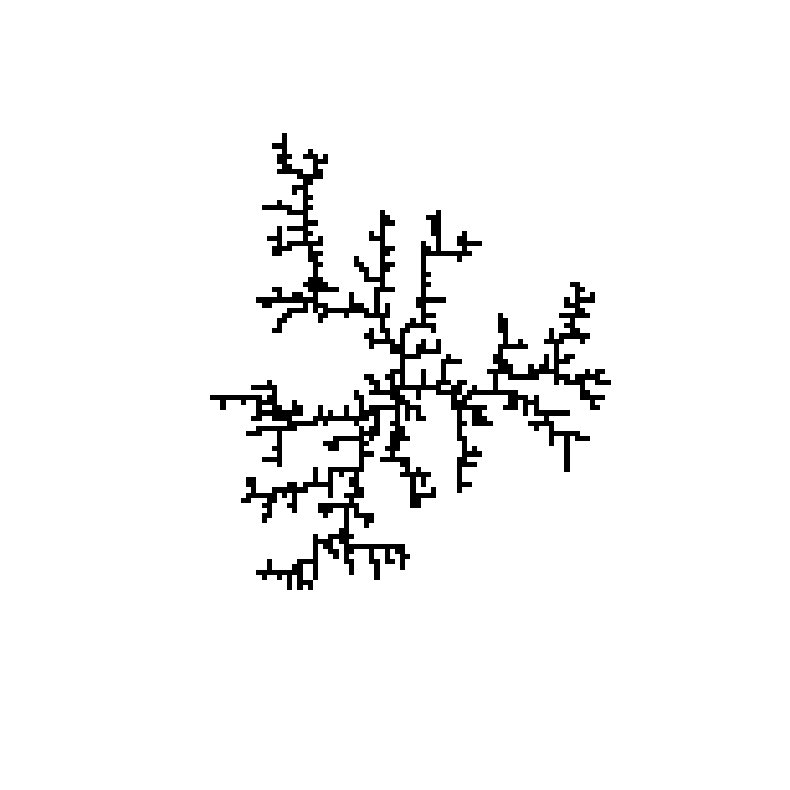

In [15]:
id = 'ff54343a-676b-4a45-a2fe-54a0e30383e9'
grid = pd.read_parquet(f'../data/{id}_grid.parquet').iloc[-1].to_numpy()
fig = plt.figure(figsize=(10, 10))
plt.imshow(-grid.reshape(150, 150), cmap='gray')
plt.axis('off');

In [7]:
node_positions = np.argwhere(grid.reshape(150, 150) == 1)
X1, X2 = np.meshgrid(node_positions[:,0], node_positions[:,0])
Y1, Y2 = np.meshgrid(node_positions[:,1], node_positions[:,1])
D = np.abs(X1 - X2) + np.abs(Y1 - Y2)
edges = np.argwhere(D == 1)

In [9]:
data = Data(edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(), num_nodes=len(node_positions))
g = to_networkx(data, to_undirected=True)

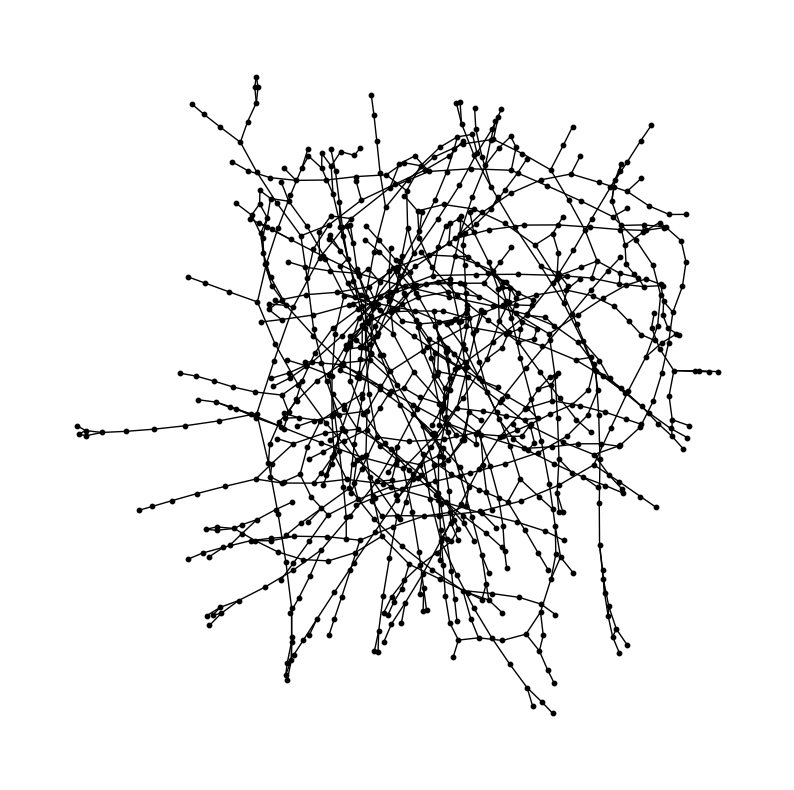

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(g, node_size=10, node_color='black', edge_color='black', with_labels=False, ax=ax)